# Comprehensive Regression Project 

## 1. Introduction to the Problem and Dataset

In this project, the goal is to build a regression model to predict house prices. The provided datasets consist of training and testing data with various features that may influence the sale price of a house. The project involves data preprocessing, model training, evaluation, and optimization.

### What is Regression
Regression analysis is a fundamental statistical method used to examine the relationships among variables. It allows us to model and analyze the relationships between a dependent variable (often called the target) and one or more independent variables (known as features). The primary goal of regression is to predict the value of the dependent variable based on the values of the independent variables, which is essential in fields like economics, biology, engineering, and social sciences.
##### Linear Regression
Linear regression is the simplest form of regression, where the relationship between the dependent variable and the independent variables is assumed to be linear. The objective of linear regression is to find the optimal coefficients that minimize the difference between the predicted values and the actual values. This is typically achieved using the Ordinary Least Squares (OLS) method, which minimizes the sum of the squared residuals (differences between observed and predicted values). 
##### Application in this Project
In this project, we utilize linear regression and its regularized forms, Ridge and Lasso regression, to model the relationship between house features and their sale prices. By understanding and applying these regression techniques, we aim to build models that can accurately predict house prices while avoiding overfitting, ensuring that the models perform well on unseen data.


##### Dataset Details
- Source: Provided `train.csv` and `test.csv` files.
- Training data: 1,460 samples with 81 features.
- Features include a mix of categorical and numerical variables.


In [1]:
import pandas as pd

# Load datasets
train_data_path = 'C:/Users/nwosu/Downloads/New folder/train.csv'
test_data_path = 'C:/Users/nwosu/Downloads/New folder/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display basic information about the training data
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Understanding and Preprocessing

### Data Exploration
The data was explored using methods such as `.info()` and `.describe()` to understand the distribution, missing values, and types of features.

### Handling Missing Values
Features with more than 50% missing data were dropped. The remaining missing values were filled based on the median for numerical features and mode for categorical features.

### Encoding Categorical Variables
One-hot encoding was applied to transform categorical variables into numerical form.


In [2]:
# Handling missing values
missing_values = train_df.isnull().mean() * 100
high_missing_features = missing_values[missing_values > 50].index.tolist()

# Drop features with more than 50% missing data
train_df_cleaned = train_df.drop(columns=high_missing_features)

# Fill missing values for remaining features
numerical_features = train_df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df_cleaned.select_dtypes(include=['object']).columns

train_df_cleaned[numerical_features] = train_df_cleaned[numerical_features].fillna(train_df_cleaned[numerical_features].median())
train_df_cleaned[categorical_features] = train_df_cleaned[categorical_features].fillna(train_df_cleaned[categorical_features].mode().iloc[0])

# Encoding categorical variables
train_df_encoded = pd.get_dummies(train_df_cleaned, drop_first=True)
train_df_encoded.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


# Comprehensive Regression Project - Part 2

## 3. Data Visualization

Histograms and a correlation heatmap were used to understand the distribution of numerical features and the relationships between features.


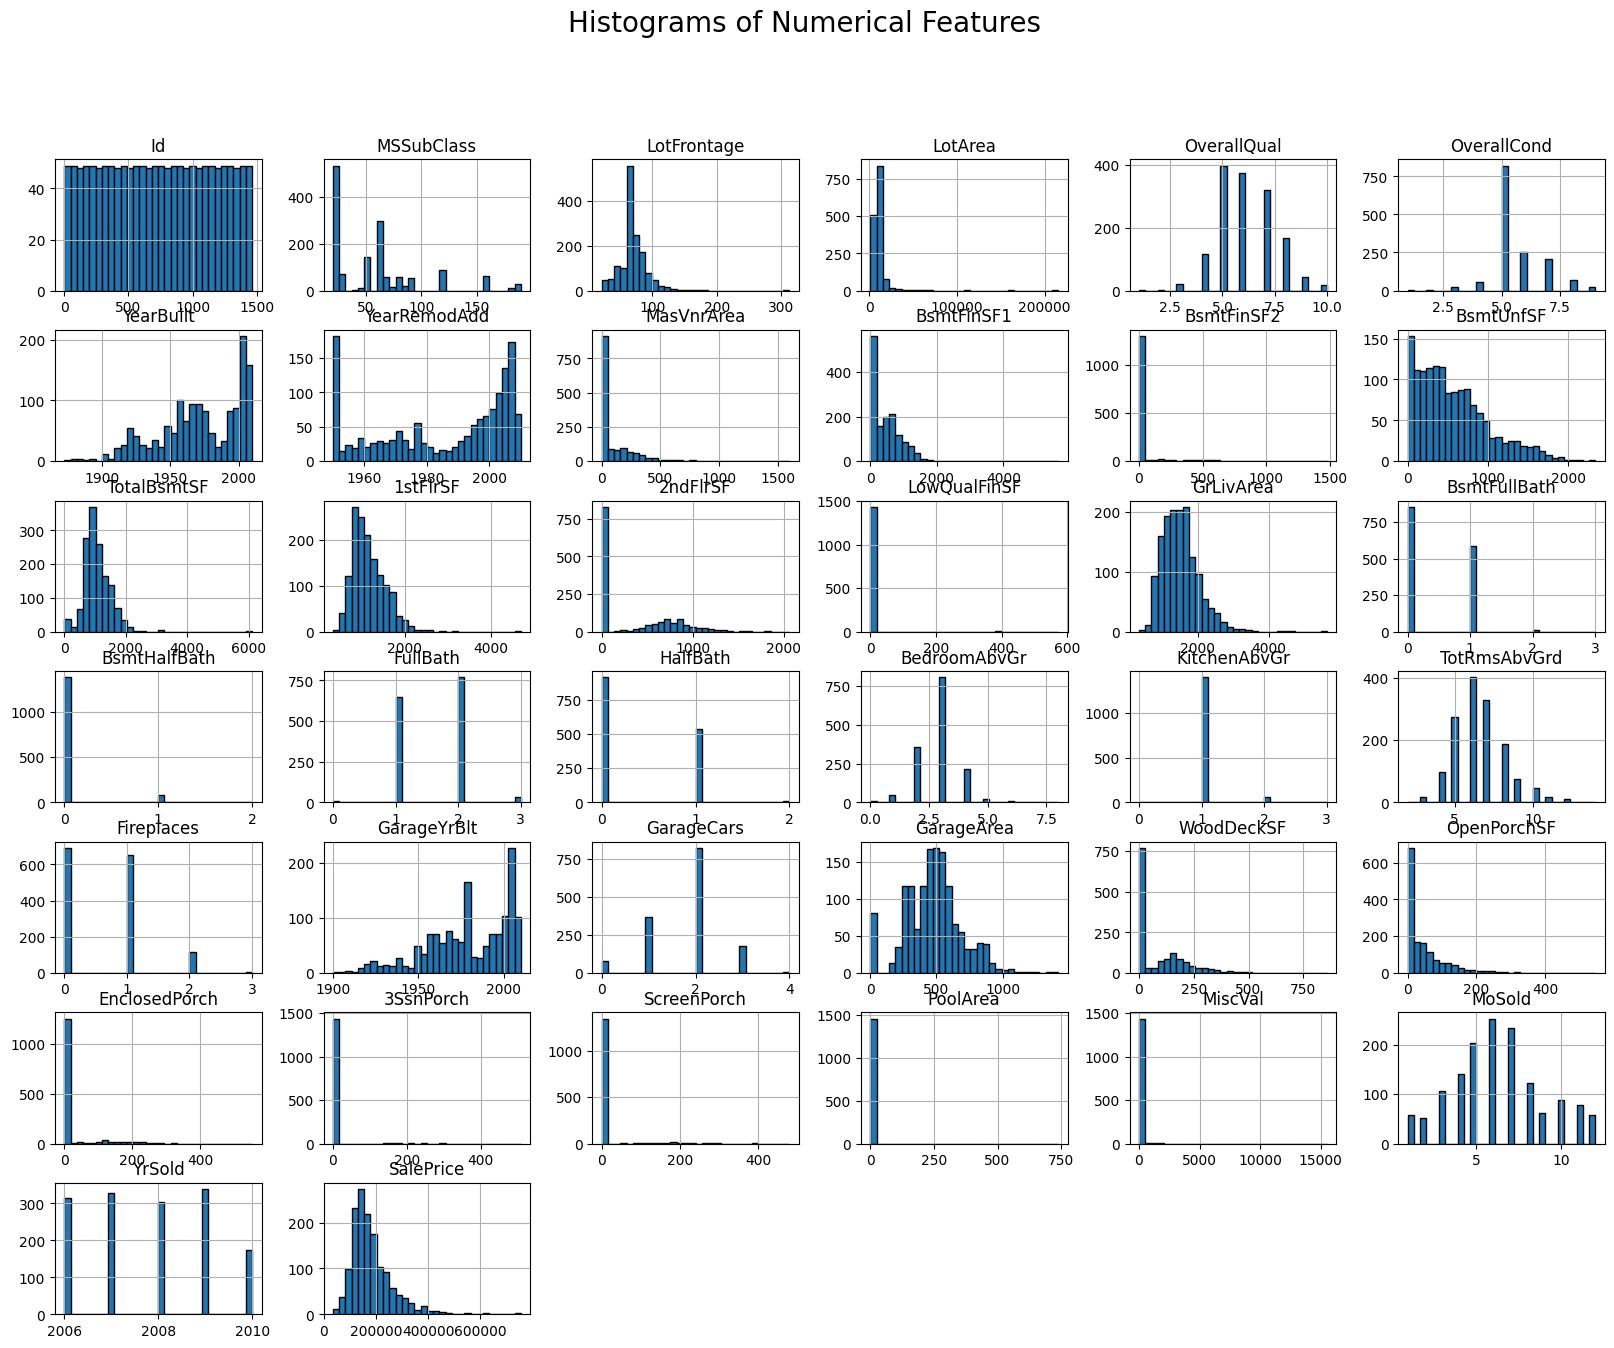

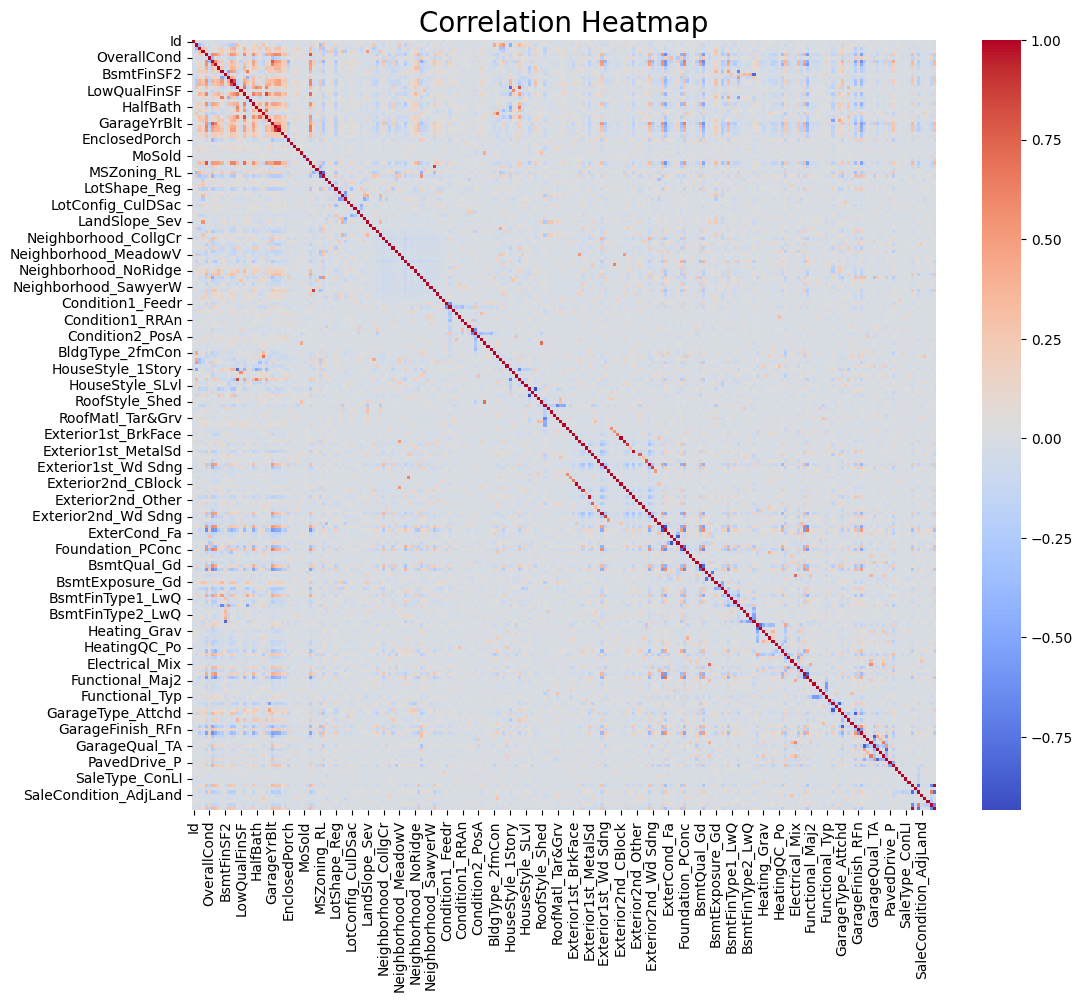

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_df_encoded.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_df_encoded.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


## 4. Initial Modeling

### Linear Regression Model
An initial linear regression model was built using features that have a high correlation with the target variable.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting features based on correlation
high_corr_features = correlation_matrix['SalePrice'][correlation_matrix['SalePrice'].abs() > 0.5].index.tolist()
high_corr_features.remove('SalePrice')

# Splitting data
X = train_df_encoded[high_corr_features]
y = train_df_encoded['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate model
y_pred = linear_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse


np.float64(39574.09880905175)

# Comprehensive Regression Project - Part 3

## 5. Advanced Modeling and Hyperparameter Tuning

### Ridge and Lasso Regression
Ridge and Lasso regression techniques were used to apply regularization and potentially improve the model by avoiding overfitting.


In [5]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Evaluating Ridge and Lasso
ridge_pred = ridge_model.predict(X_val_scaled)
lasso_pred = lasso_model.predict(X_val_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_pred))

ridge_rmse, lasso_rmse


(np.float64(39579.81440319947), np.float64(39574.10976044503))

### Hyperparameter Tuning for Ridge and Lasso

Grid Search was used to find the optimal values for the regularization parameter (alpha) for both Ridge and Lasso regression.


In [6]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for alpha values
alpha_range = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid search for Ridge regression
ridge_grid_search = GridSearchCV(Ridge(), param_grid=alpha_range, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

# Grid search for Lasso regression
lasso_grid_search = GridSearchCV(Lasso(), param_grid=alpha_range, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluation of tuned models
best_ridge_pred = best_ridge_model.predict(X_val_scaled)
best_lasso_pred = best_lasso_model.predict(X_val_scaled)

best_ridge_rmse = np.sqrt(mean_squared_error(y_val, best_ridge_pred))
best_lasso_rmse = np.sqrt(mean_squared_error(y_val, best_lasso_pred))

best_ridge_rmse, best_lasso_rmse


(np.float64(40178.237960506434), np.float64(39587.3502026962))

# Comprehensive Regression Project - Part 4

## 7. Evaluation and Comparison

The performance of the models was evaluated using Root Mean Squared Error (RMSE) on the validation set. The models considered include linear regression, Ridge, Lasso, and ensemble methods (Random Forest and Gradient Boosting).


In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Ensemble methods
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)

rf_pred = random_forest_model.predict(X_val_scaled)
gb_pred = gradient_boosting_model.predict(X_val_scaled)

rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
gb_rmse = np.sqrt(mean_squared_error(y_val, gb_pred))

rf_rmse, gb_rmse


(np.float64(29003.365618765056), np.float64(29653.503513727115))

## 8. Impact Analysis

The predictions generated by our models can have significant implications for various stakeholders in the real estate market. For homebuyers and sellers, accurate price predictions can inform decision-making, helping them to buy or sell properties at fair prices. Real estate agents can leverage the model to advise clients and set appropriate listing prices, enhancing market efficiency.

However, there are potential negative impacts to consider. If the data used to train the model contains biases related to location, socioeconomic status, or other factors, the model may perpetuate these biases, leading to unfair pricing and potentially discriminating against certain groups. Overreliance on predictive models could also affect market dynamics, possibly causing price inflation or deflation.

Ethical considerations are paramount. Ensuring transparency in how the model makes predictions is essential to build trust among users. Protecting the privacy of individuals whose data may be included in the dataset is also critical. Additionally, the model must comply with housing regulations and anti-discrimination laws to prevent unlawful practices.

By acknowledging these potential impacts and taking steps to mitigate negative consequences, we can develop models that are both effective and ethically responsible.


## 9. Conclusion

Through this project, we have learned the importance of comprehensive data preprocessing, including handling missing values and encoding categorical variables, which significantly impacts model performance. Feature selection based on correlation helped us focus on the most influential variables, reducing dimensionality and improving efficiency.

The experiments demonstrated that while linear regression provides a useful baseline, it may not capture the complexity of real-world data. Regularization techniques like Ridge and Lasso regression improved the models by penalizing large coefficients and preventing overfitting. Hyperparameter tuning was essential in optimizing these models, highlighting the importance of fine-tuning model parameters.

Ensemble methods, specifically Random Forest and Gradient Boosting, excelled in predicting house prices by capturing nonlinear patterns and interactions among features. These models significantly outperformed linear models, emphasizing the value of exploring advanced algorithms.

Evaluating models using RMSE allowed us to quantitatively compare performance and make informed decisions about model selection. The project also underscored the importance of considering the ethical implications of predictive modeling, including potential biases and the need for transparency.

## 10. References

- Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Gradient Boosting Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- Pandas Documentation: https://pandas.pydata.org/docs/
- Seaborn Documentation: https://seaborn.pydata.org/
- Matplotlib Documentation: https://matplotlib.org/stable/index.html
- Housing Prices Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques